In [5]:
import pandas as pd
df = pd.read_csv('Housing.csv')
print(df.head(10))
print(df.info())

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_unique_counts = {col: df[col].nunique() for col in categorical_cols}
print(cat_unique_counts)

{'mainroad': 2, 'guestroom': 2, 'basement': 2, 'hotwaterheating': 2, 'airconditioning': 2, 'prefarea': 2, 'furnishingstatus': 3}


In [7]:
binary_map = {'yes': 1, 'no': 0}
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[col] = df[col].map(binary_map)

In [8]:
furnishing_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus')
df = pd.concat([df, furnishing_dummies], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)

In [9]:
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                        True                            False   
1                        T

In [10]:
bool_cols = ['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in bool_cols:
    df[col] = df[col].astype(int)

print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                           1                                0   
1                         

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 14)
X_test shape: (109, 14)
y_train shape: (436,)
y_test shape: (109,)


In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Output coefficients and intercept for your information
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05  1.80175627e+05
  5.32938090e+04 -2.33469436e+05]
Intercept: 79856.73100297339


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.6529


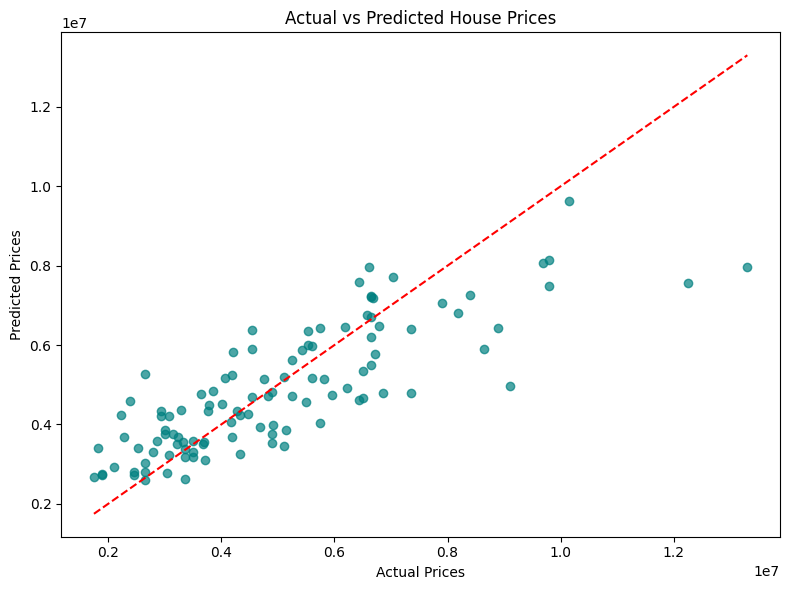

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.tight_layout()
plt.show()

In [15]:
feature_names = X_train.columns.tolist()
coefficients = model.coef_

feature_coefficients = dict(zip(feature_names, coefficients))

sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, coef in sorted_features:
    print(f"{feature}: {coef:.2f}")

bathrooms: 1094444.79
airconditioning: 791426.74
hotwaterheating: 684649.89
prefarea: 629890.57
stories: 407476.59
basement: 390251.18
mainroad: 367919.95
furnishingstatus_unfurnished: -233469.44
guestroom: 231610.04
parking: 224841.91
furnishingstatus_furnished: 180175.63
bedrooms: 76778.70
furnishingstatus_semi-furnished: 53293.81
area: 235.97
